

### Laura Johanna Rodríguez Nolasco
### Tarea #2 - AI en Optimización




###### Se va a desarrollar en Python un programa que permita al usuario indicar un número de soluciones no dominadas a representar en el espacio de los objetivos en un supuesto problema de optimización, de modo que pida al usuario que introduzca la siguiente información: 

###### a. el número de objetivos del problema (2 ó 3) a optimizar 

###### b. para cada uno de ellos, si se maximiza o se minimiza 

###### c. el rango de valores para cada uno de los objetivos 

###### d. el número de soluciones no dominadas que se quieren generar

###### Una vez introducida toda la información anterior, el programa debe representar gráficamente, en el espacio de los objetivos, las soluciones no dominadas que ha generado.

In [4]:
#Instalamos las librería necesarias

import random #proporciona funciones para generar números aleatorios.
import matplotlib.pyplot as plt  #creación de gráficos.
from mpl_toolkits.mplot3d import Axes3D #también para gráficos

In [5]:
# Leer los datos del usuario
def leer_datos_usuario():
    num_objectives = int(input("Enter the number of objectives (2 or 3): ")) #Preguntamos al usuario si quiere 2 o 3 objetivos a optimizar
    maximization = ["True" == input(f"Maximize objective {i+1}? (True/False): ") for i in range(num_objectives)] #Preguntamos al usuario si va a maximizar (true) o a minimizar (false)
    objective_ranges = [tuple(map(float, input(f"Enter the range for objective {i+1} (low high): ").split())) for i in range(num_objectives)]# rango de valores para cada uno de los objetivos
    num_solutions = int(input("Enter the number of non-dominated solutions to generate: ")) #número de soluciones no dominadas que se quiere generar
    return num_objectives, maximization, objective_ranges, num_solutions

In [6]:
# Generar soluciones iniciales
def generar_soluciones(num_objectives, maximization, objective_ranges, num_solutions):
    puntos = []     #Inicialización de una lista para almacenar puntos
    for i in range(num_objectives):
        minimo, maximo = objective_ranges[i]
        margen = ((0.10) * (maximo-minimo)) # Hacemos que un 10% de los valores, no sean elegidos entre el rango de objetivos.
        maximo -= margen 
        minimo += margen 
        lista_valores = [random.uniform(minimo, maximo) for _ in range(num_solutions)] #ajustamos el número de soluciones en el rango ajustado
        lista_valores.sort()
        puntos.append(lista_valores)
    if maximization[0] == maximization[1]: #Si ambos objetivos tienen la misma optimización (Max o Min), se invierte la lista de valores del segundo objetivo.
        puntos[1].reverse() 

    return puntos

In [7]:
# Verificar dominancia
def dominancia(sol_a, sol_b, maximization):  #verificamos si una solución domina a otra, comparando los valores de las listas
    dominan_a = all((a >= b if m else a <= b) for a, b, m in zip(sol_a, sol_b, maximization))
    dominan_b = all((a <= b if m else a >= b) for a, b, m in zip(sol_a, sol_b, maximization))
    return dominan_a, dominan_b

In [26]:
# Graficar en 2D (cuando el usuario selecciona 2 objetivos)

def graficar_2d(soluciones, nueva_solucion=None):
    x, y = zip(*soluciones)
    plt.figure(figsize=(10, 6), dpi=100)
    plt.scatter(x, y, color='salmon', s=100, edgecolor='black', linewidth=1, alpha=0.7, label='Puntos') #formato de la frontera
    #plt.plot(x, y, color='red', linewidth=2, linestyle='--', label='Línea')
    if nueva_solucion:
        plt.scatter(*nueva_solucion, color='cornflowerblue', s=100, edgecolor='black', linewidth=1, alpha=0.7, label='Nueva solución')  # cuando se inserte una nueva solución, esta será de color azul.
    plt.title('Gráfica 2 D', fontsize=16)
    plt.xlabel('Eje X', fontsize=14)
    plt.ylabel('Eje Y', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.show()

In [34]:
# Graficar en 3D (cuando hay 3 objetivos)
def graficar_3d(soluciones, nueva_solucion=None):
    x, y, z = zip(*soluciones)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, color='plum', edgecolor='black', marker='o') #formato de la frontera
    #ax.plot(x, y, z, color='red')
    if nueva_solucion:
        ax.scatter(*nueva_solucion, color='crimson', edgecolor='black', marker='o') # cuando se inserte una nueva solución, esta será de color rojo.
    ax.set_title('Gráfica 3D')
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    plt.show()

In [10]:
# Programa principal
def main():
    num_objectives, maximization, objective_ranges, num_solutions = leer_datos_usuario() 
    puntos = generar_soluciones(num_objectives, maximization, objective_ranges, num_solutions)

    soluciones = list(zip(*puntos)) #los puntos se vuelven una lista de soluciones.

    if num_objectives == 2: #se generará una gráfica distinta si se eligió 2 o 3 objetivos
        graficar_2d(soluciones)
    else:
        graficar_3d(soluciones)

    while True:
        nueva_solucion = tuple(map(float, input(f"Enter a new solution ({num_objectives} values): ").split())) #solicita al usuario introducir una nueva solución 
        if len(nueva_solucion) != num_objectives:
            print("Número de objetivos incorrecto. Intente de nuevo.")  #si no esta dentro de la cantidad de objetivos establecidos, pedirá intentarlo de nuevo.
            continue

        dominan = 0
        dominadas = 0

        for sol in soluciones:
            dom_a, dom_b = dominancia(sol, nueva_solucion, maximization)
            if dom_a:
                dominan += 1
            if dom_b:
                dominadas += 1

        print(f"{dominan} soluciones iniciales dominan la nueva solución.") # El programa indica al usuario  cuantas soluciones dominan la nueva solución insertada
        print(f"{dominadas} soluciones iniciales son dominadas por la nueva solución.") # El programa indica al usuario  cuantas soluciones son dominadas por la nueva solución insertada

        if num_objectives == 2:
            graficar_2d(soluciones, nueva_solucion)
        else:
            graficar_3d(soluciones, nueva_solucion)

        soluciones.append(nueva_solucion)

        continuar = input("¿Desea introducir otra solución? (y/n): ").lower() # se le pregunta al usuario tras añadir la primera solución, si quiere introducir una nueva
        if continuar != 'y':
            break


###### a) En un problema de optimización con dos objetivos (Max, Min), cuyos valores se encuentran en los rangos [0,10] y [100, 1000] respectivamente,  generar y representar 100 soluciones no dominadas. Añadir dos soluciones que dominen a todas las generadas en a) y otras dos dominadas por todas ellas. Después, añadir una solución cualquiera en el rango de los objetivos y determinar los contadores para ella. 

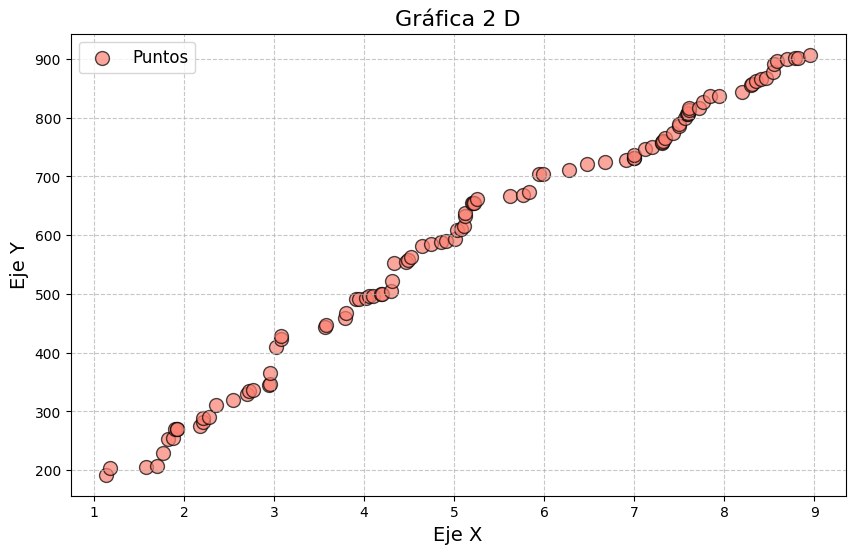

0 soluciones iniciales dominan la nueva solución.
100 soluciones iniciales son dominadas por la nueva solución.


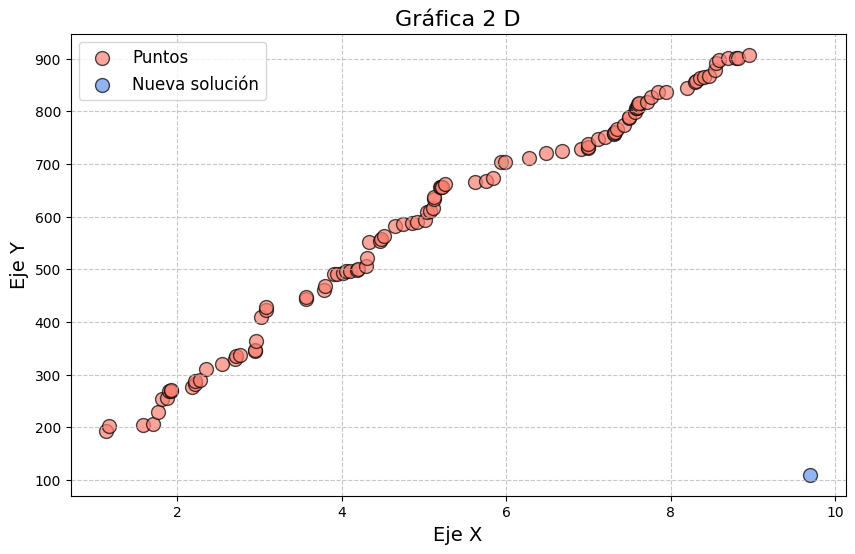

0 soluciones iniciales dominan la nueva solución.
100 soluciones iniciales son dominadas por la nueva solución.


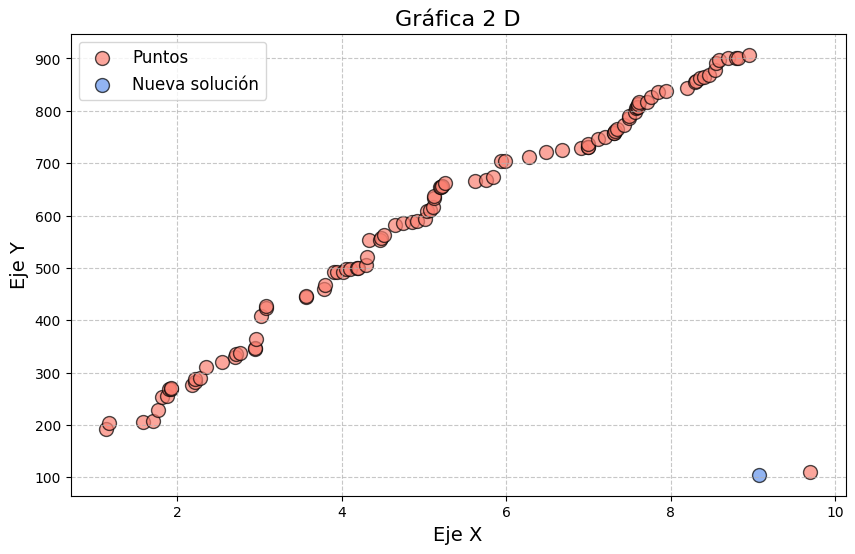

102 soluciones iniciales dominan la nueva solución.
0 soluciones iniciales son dominadas por la nueva solución.


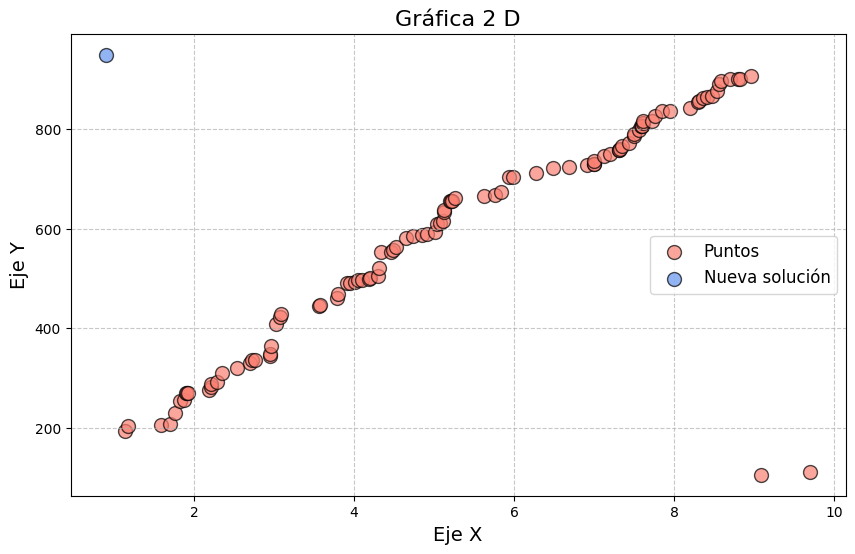

102 soluciones iniciales dominan la nueva solución.
0 soluciones iniciales son dominadas por la nueva solución.


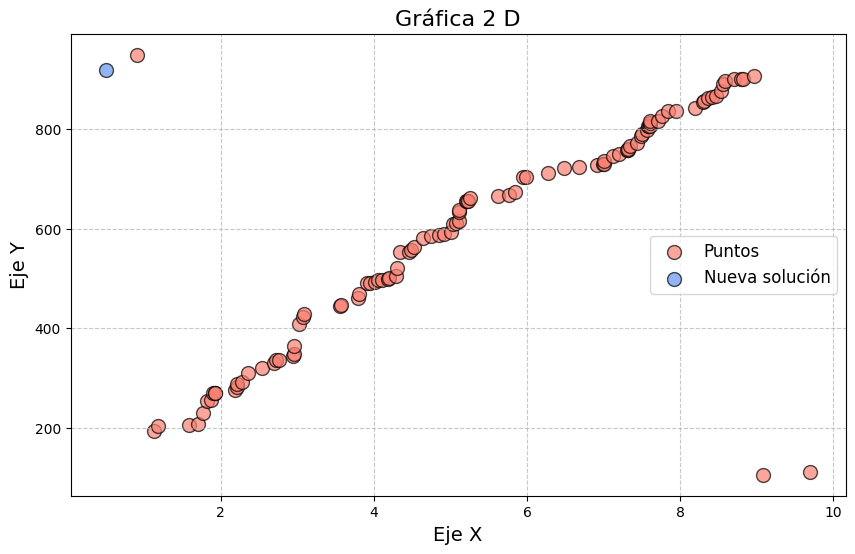

13 soluciones iniciales dominan la nueva solución.
2 soluciones iniciales son dominadas por la nueva solución.


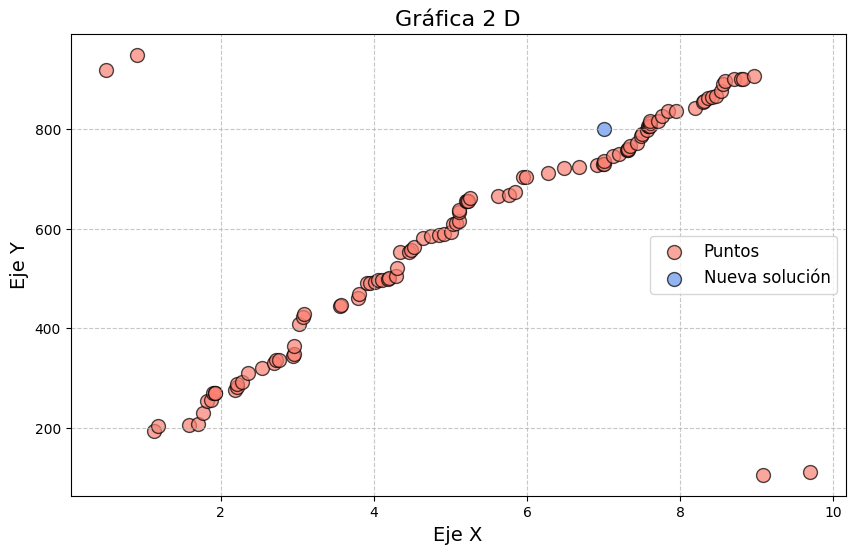

In [30]:
main() # Ejecutar el programa para el acapite 2.a

###### b). En un problema de optimización con dos objetivos (Min, Min), cuyos valores se encuentran en los rangos [0,10] generar y representar 10 soluciones no dominadas. Añadir dos soluciones que dominen a todas las generadas en b) y otras dos dominadas por todas ellas. Después, añadir una solución cualquiera en el rango de los objetivos y determinar los contadores para ella. 

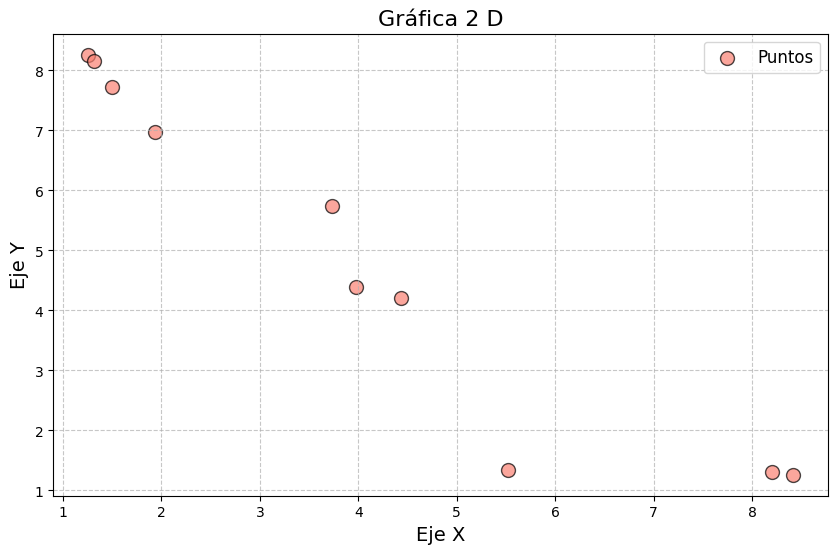

0 soluciones iniciales dominan la nueva solución.
10 soluciones iniciales son dominadas por la nueva solución.


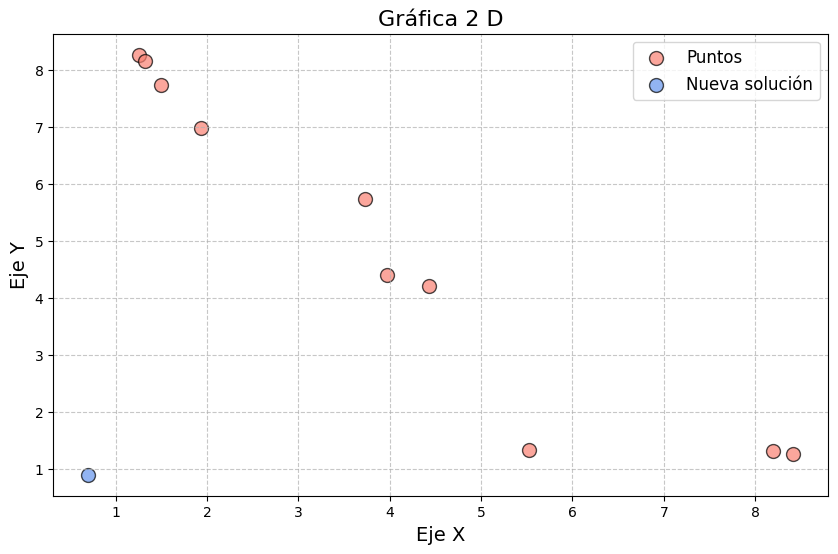

0 soluciones iniciales dominan la nueva solución.
10 soluciones iniciales son dominadas por la nueva solución.


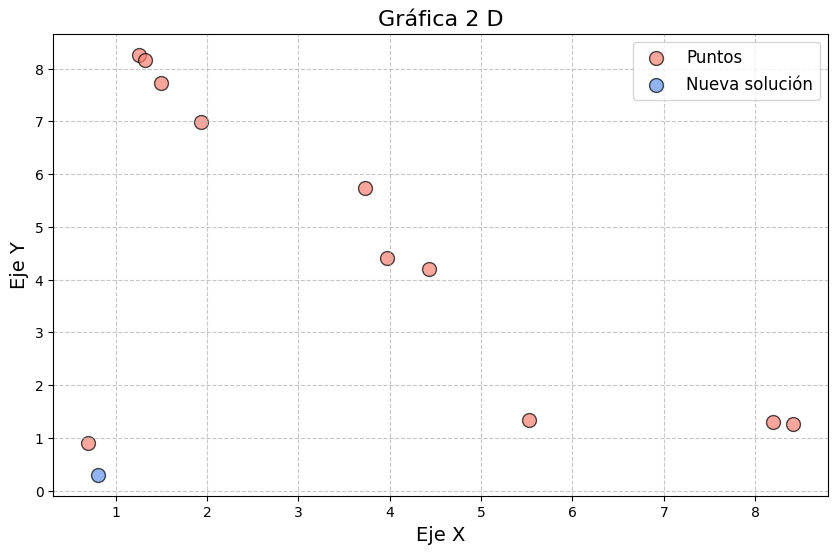

12 soluciones iniciales dominan la nueva solución.
0 soluciones iniciales son dominadas por la nueva solución.


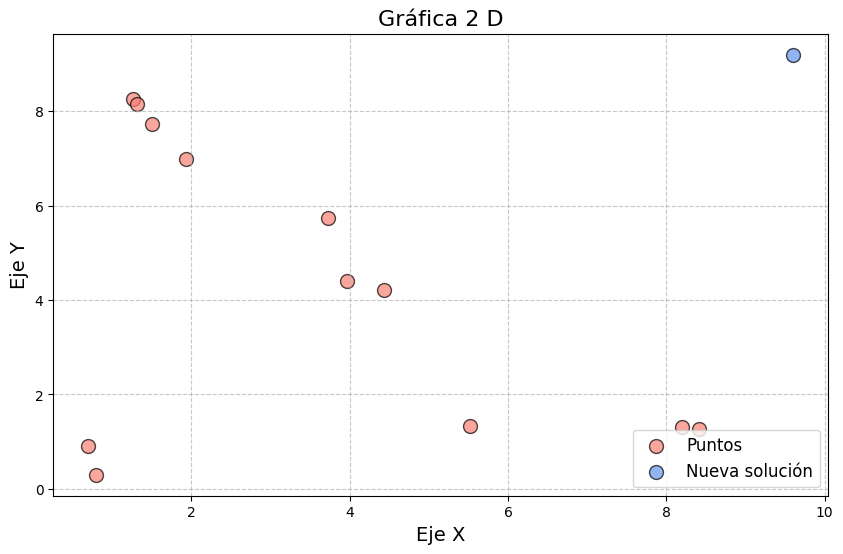

12 soluciones iniciales dominan la nueva solución.
0 soluciones iniciales son dominadas por la nueva solución.


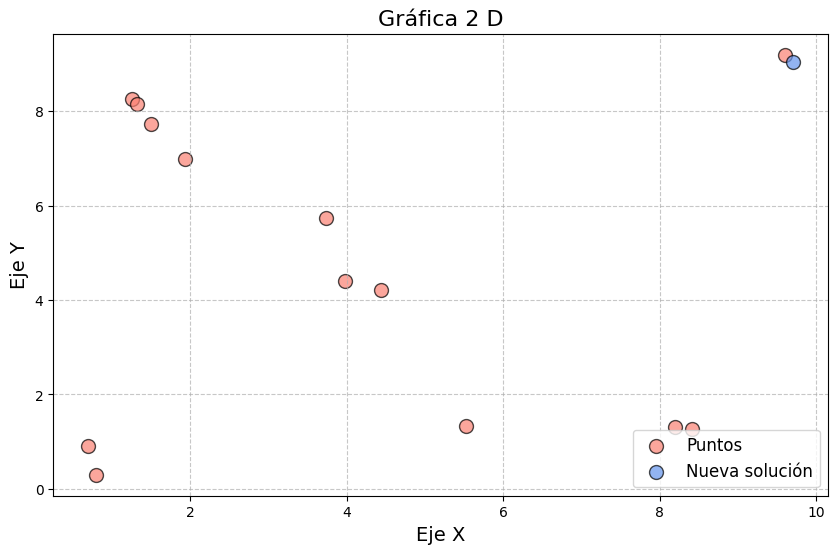

6 soluciones iniciales dominan la nueva solución.
2 soluciones iniciales son dominadas por la nueva solución.


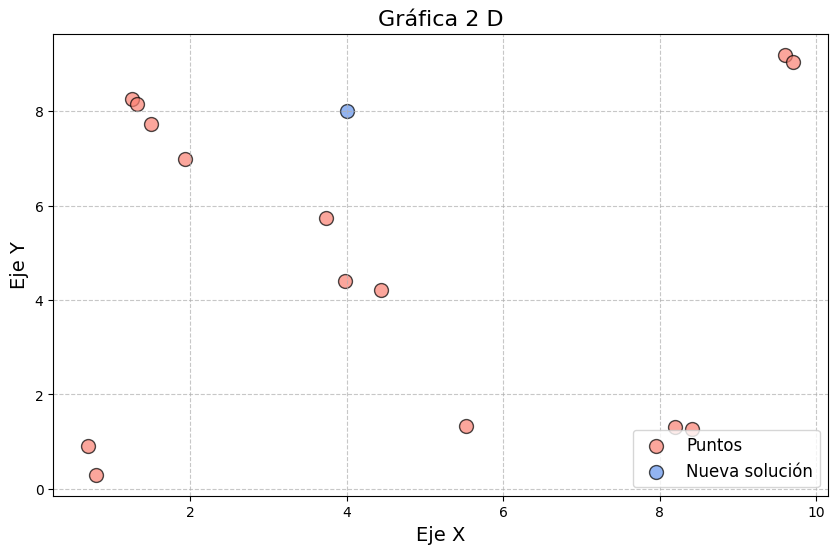

In [32]:
main() # Ejecutar el programa para el acapite 2.b

###### c). En un problema de optimización con tres objetivos (Min, Max, Min), cuyos valores se encuentran en los rangos [0,100] generar y representar 100 soluciones no dominadas. Añadir dos soluciones que dominen a todas las generadas en c) y otras dos dominadas por todas ellas. Después, añadir una solución cualquiera en el rango de los objetivos y determinar los contadores para ella. 

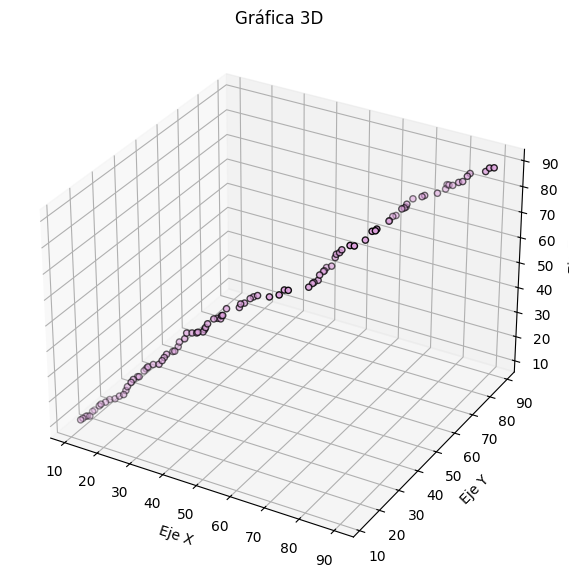

0 soluciones iniciales dominan la nueva solución.
100 soluciones iniciales son dominadas por la nueva solución.


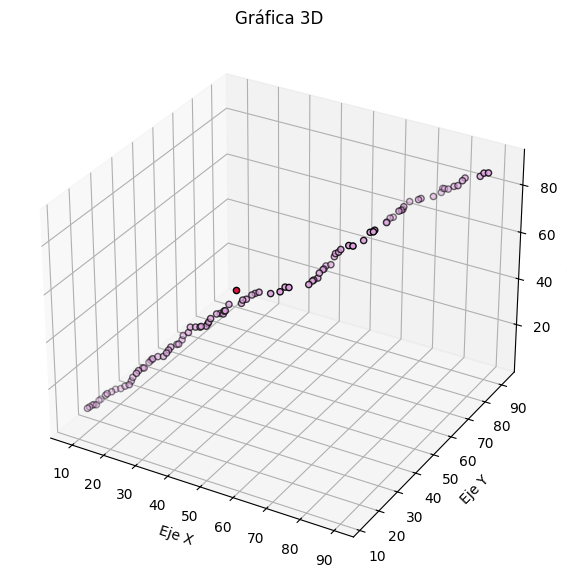

0 soluciones iniciales dominan la nueva solución.
100 soluciones iniciales son dominadas por la nueva solución.


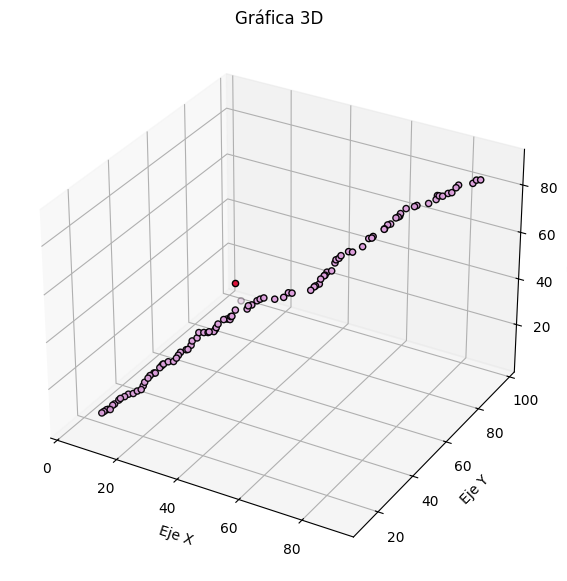

102 soluciones iniciales dominan la nueva solución.
0 soluciones iniciales son dominadas por la nueva solución.


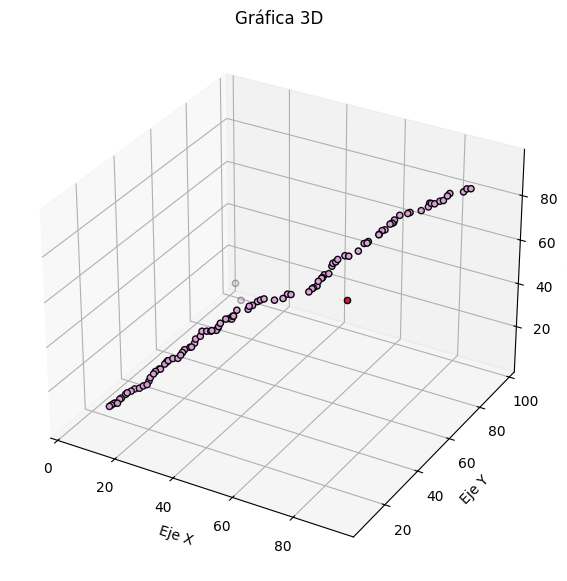

102 soluciones iniciales dominan la nueva solución.
0 soluciones iniciales son dominadas por la nueva solución.


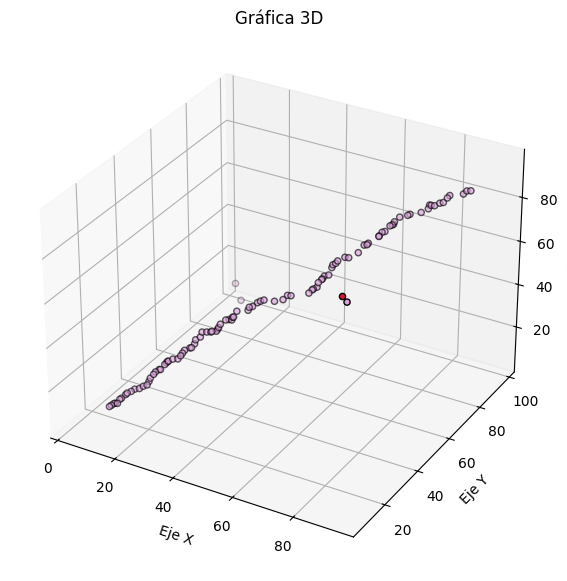

1 soluciones iniciales dominan la nueva solución.
2 soluciones iniciales son dominadas por la nueva solución.


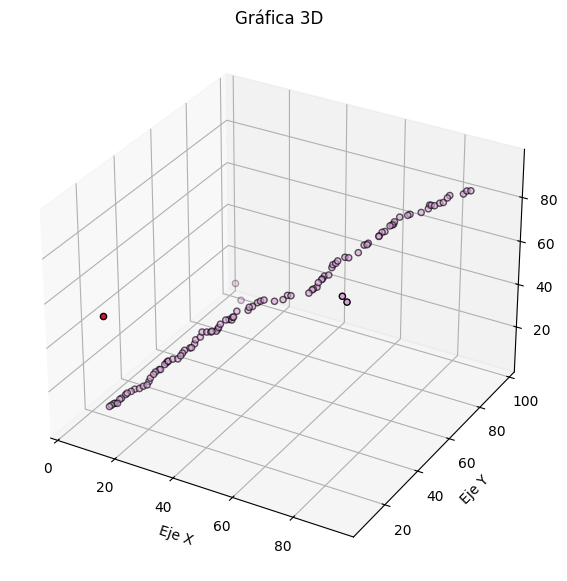

In [35]:
main() # Ejecutar el programa para el acapite 2.c